## About this task


####  The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.
#### The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.


### BigMart Sales Prediction practice problem

- We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

- Item_Identifier: Unique product ID

- Item_Weight: Weight of product

- Item_Fat_Content: Whether the product is low fat or not

- Item_Visibility: The % of total display area of all products in a store allocated to the particular product

- Item_Type: The category to which the product belongs

- Item_MRP: Maximum Retail Price (list price) of the product

- Outlet_Identifier: Unique store ID

- Outlet_Establishment_Year: The year in which store was established

- Outlet_Size: The size of the store in terms of ground area covered

- Outlet_Location_Type: The type of city in which the store is located

- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted

#### - hypothesis generation involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

- hypothesis can be done in different levels (Store Level,Product Level,Customer Level,Macro Level)
- store level as in  marketing, location and competitors
- Product level as in brand and packaging
- Customer level as in family income, family member ages and their jobs.
- Macro level as in environent and the whole economics


# Loading structure

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import warnings
from xgboost import XGBRegressor
warnings.filterwarnings("ignore")

# Reading training data

In [2]:
train = pd.read_csv("C:/Users/DELL/Desktop/Train.csv")

test=pd.read_csv("C:/Users/DELL/Desktop/Test.csv")

## Data structure and content

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
# view the statistics of data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# check for duplicated values
sum(train.duplicated())

0

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# check for missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Treatment of missing values for Item_Weight & Outlet_Size 
- Categoral data can be filled with mode
- Numerical data can be filled with mean

In [11]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [12]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data correction for Item_Fat_Content

In [13]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [15]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## EDA:
- Univariate Exploration
- Bivariate  Exploratioj

## Univariate Exploration

In [16]:
# Distribution of Item Weight

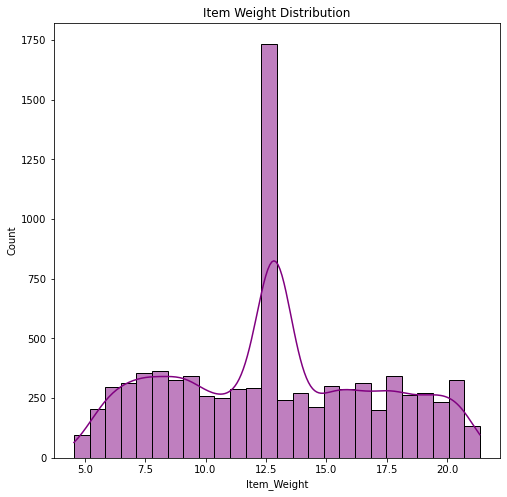

In [17]:
plt.figure(figsize=(8,8))
plt.title("Item Weight Distribution")
sns.histplot(data=train, x='Item_Weight', kde=True, color = 'purple')
plt.show()

### From the above plot we can observe that a lot of items have a weight of 12.5

In [18]:
item_fat_content_table = train.groupby('Item_Fat_Content').agg({'Item_Identifier':'count'})

item_fat_content_table['perc'] = (item_fat_content_table['Item_Identifier']/item_fat_content_table['Item_Identifier'].sum())*100

item_fat_content_table

,Item_Identifier,perc
Item_Fat_Content,,
Low Fat,5517,64.730729
Regular,3006,35.269271


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


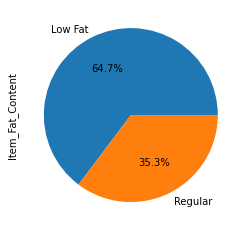

In [19]:
train['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(train['Item_Fat_Content'].value_counts())

### we can see that we have more items from low fat category rather than regular

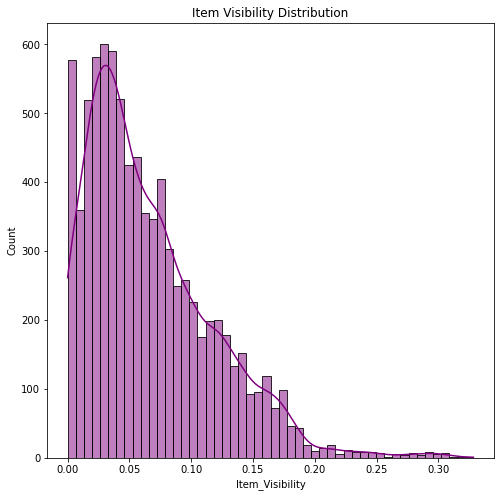

In [20]:
# Distribution of Item Visibility
plt.figure(figsize=(8,8))
plt.title("Item Visibility Distribution")
sns.histplot(data=train, x='Item_Visibility', kde=True,color = 'purple')
plt.show()

In [21]:
# From the plot it is evident that majority of the items have visibility less than 0.20

In [22]:
#Distribution of Item Type
item_type_content_table = train.groupby('Item_Type').agg({'Item_Identifier':'count'})

item_type_content_table['perc'] = (item_type_content_table['Item_Identifier']/item_type_content_table['Item_Identifier'].sum())*100

item_type_content_table

,Item_Identifier,perc
Item_Type,,
Baking Goods,648,7.602957
Breads,251,2.944972
Breakfast,110,1.290625
Canned,649,7.614690
Dairy,682,8.001877
Frozen Foods,856,10.043412
Fruits and Vegetables,1232,14.455004
Hard Drinks,214,2.510853
Health and Hygiene,520,6.101138


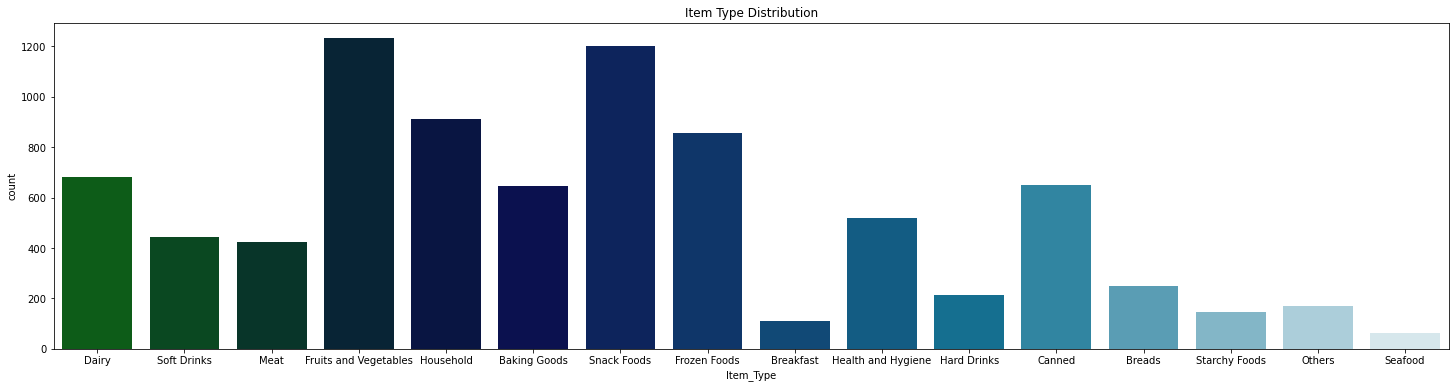

In [23]:
plt.figure(figsize=(25,6))
plt.title("Item Type Distribution")
sns.countplot(data=train, x='Item_Type',palette='ocean')
plt.show()

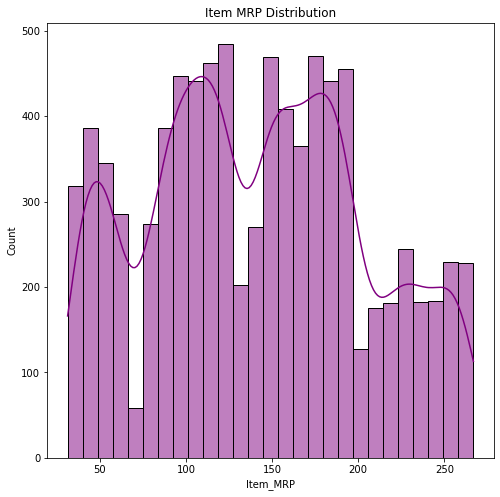

In [24]:
# Distribution of Item MRP
plt.figure(figsize=(8,8))
plt.title("Item MRP Distribution")
sns.histplot(data=train, x='Item_MRP', kde=True, color = 'purple')
plt.show()

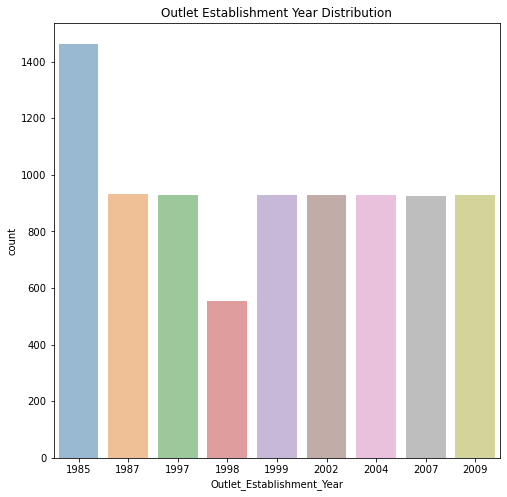

In [25]:
# Distribution of Outlet Establishment Year
plt.figure(figsize=(8,8))
plt.title("Outlet Establishment Year Distribution")
sns.countplot(data=train, x='Outlet_Establishment_Year',alpha=0.5)
plt.show()

### More than 1400 outlet were established in 1985

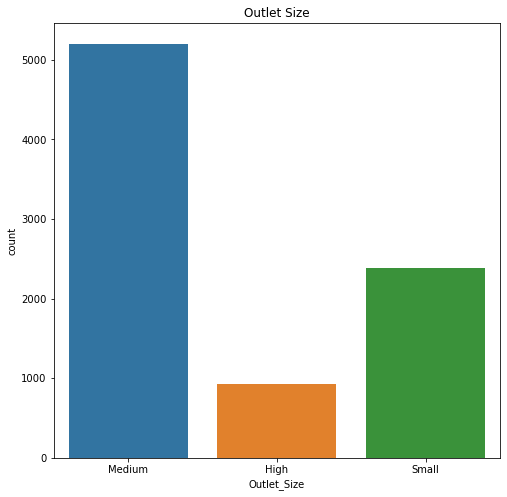

In [26]:
#Distribution of Outlet Size
plt.figure(figsize=(8,8))
plt.title("Outlet Size")
sns.countplot(data=train, x='Outlet_Size')
plt.show()

### Majority of Outlets are of medium size.

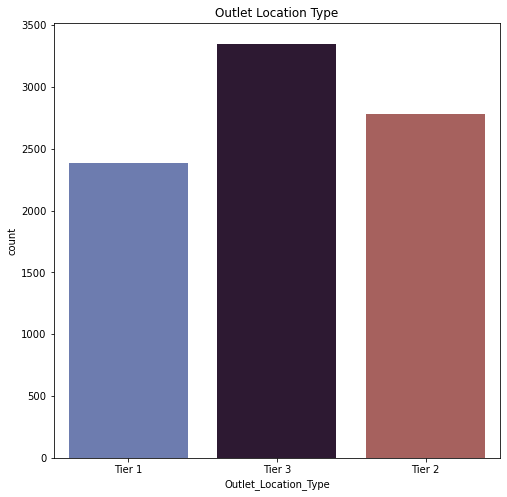

In [27]:
# Distribution of Outlet Location Type
plt.figure(figsize=(8,8))
plt.title("Outlet Location Type")
sns.countplot(data=train, x='Outlet_Location_Type',palette='twilight')
plt.show()

### Major outlets are in Tier 3 locactions followed by Tier 2 and Tier 1.

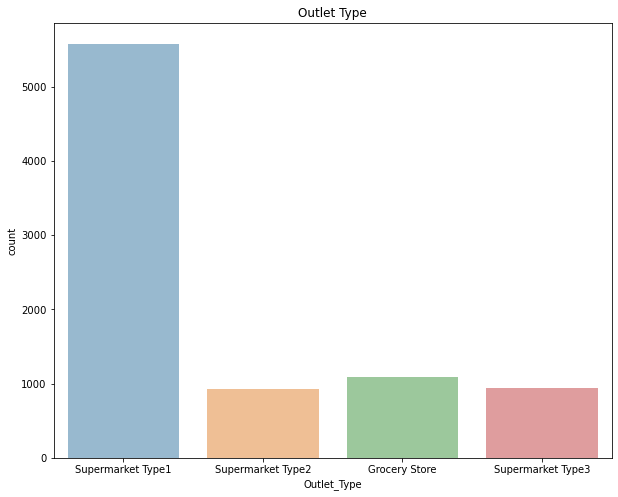

In [28]:
#Distribution of Outlet Type
plt.figure(figsize=(10,8))
plt.title("Outlet Type")
sns.countplot(data=train, x='Outlet_Type',alpha=0.5)
plt.show()

### Majority Outlets belong to Supermarket Type 1

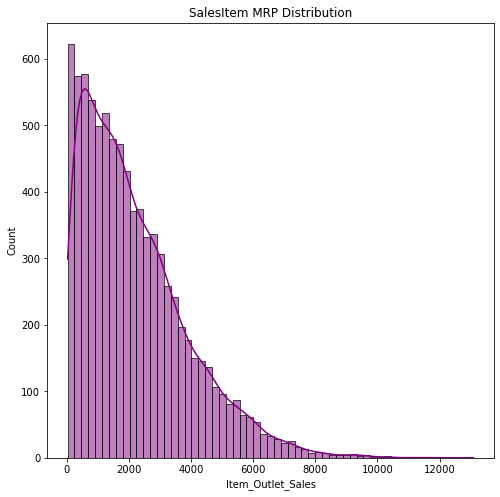

In [29]:
# Sales Distribution
plt.figure(figsize=(8,8))
plt.title("SalesItem MRP Distribution")
sns.histplot(data=train, x='Item_Outlet_Sales', kde=True,color='purple')
plt.show()

## Bivariate Exploration 

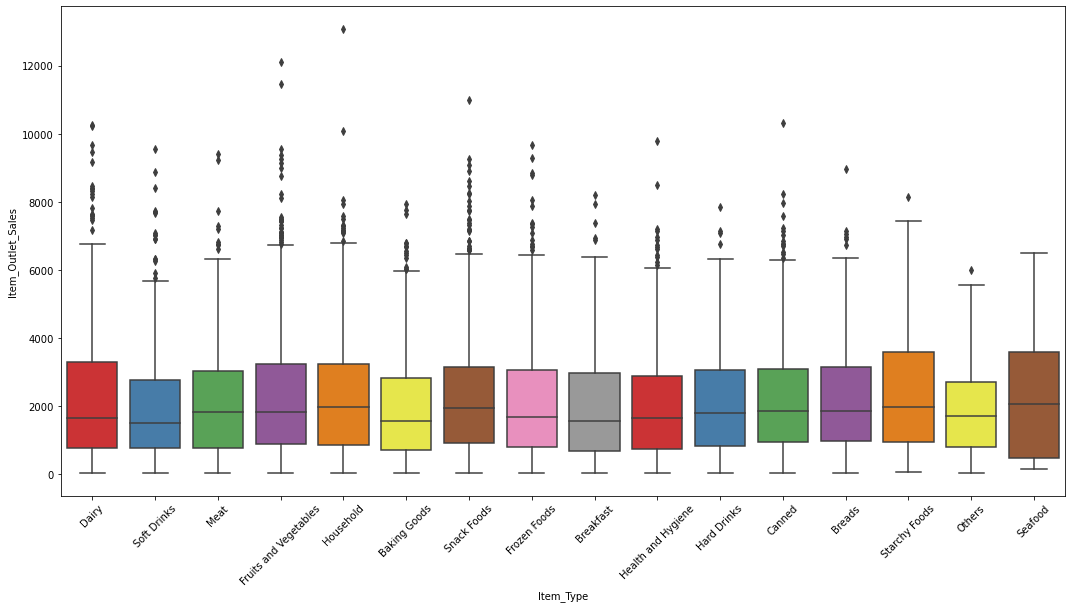

In [30]:
plt.figure(figsize = (18,9))
ax=sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette="Set1")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [31]:
#Get the first two characters of ID:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

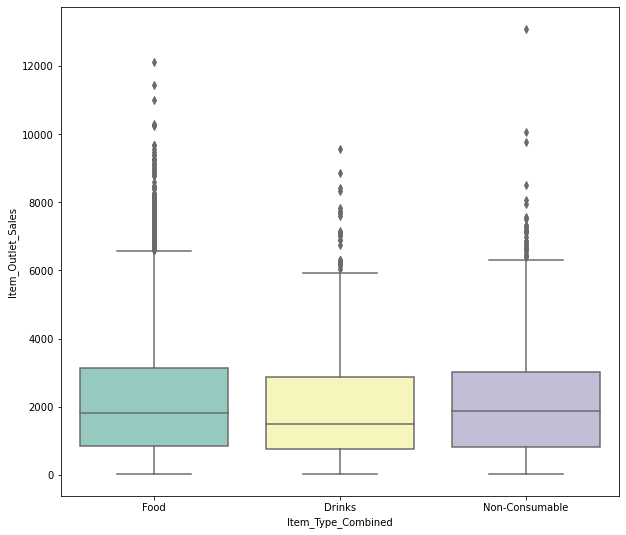

In [32]:
plt.figure(figsize = (10,9))

sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=train, palette="Set3")

plt.show()


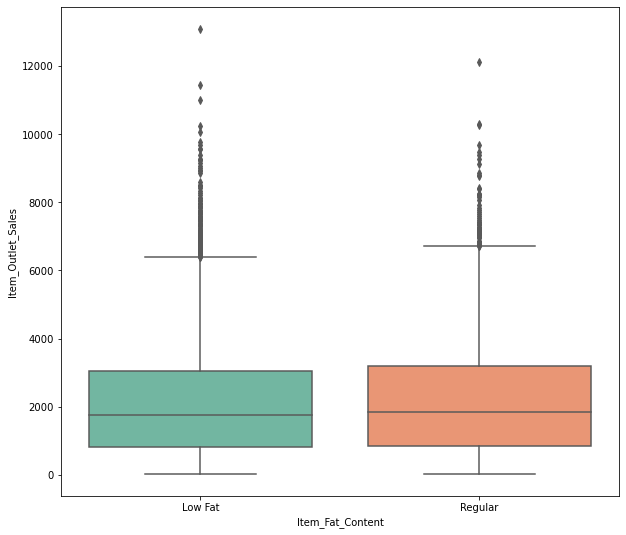

In [33]:
plt.figure(figsize = (10,9))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train, palette="Set2")
plt.show()

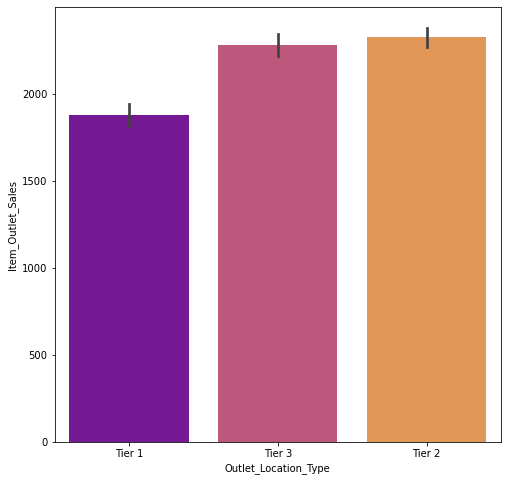

In [34]:
plt.figure(figsize=(8,8))
sns.barplot(data=train, x = 'Outlet_Location_Type', y='Item_Outlet_Sales',palette='plasma')
plt.show()

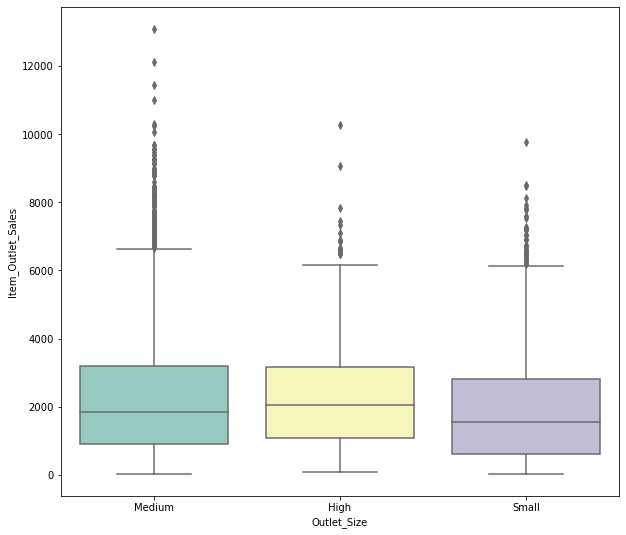

In [35]:
plt.figure(figsize = (10,9))

sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train, palette="Set3")

plt.show()

## Encoding ( label encoding - one hot encoding)

In [36]:
for i in train.columns:
    if train[i].dtype=='object':
            label_encoder=LabelEncoder()
            train[i]=label_encoder.fit_transform(train[i])

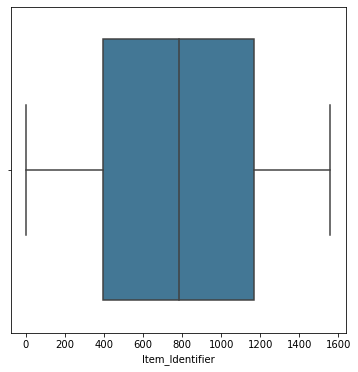

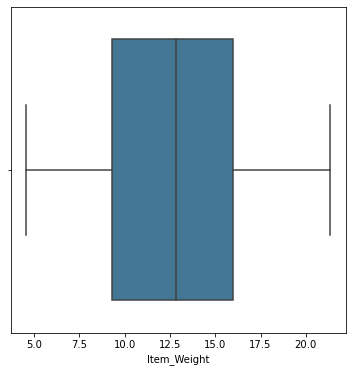

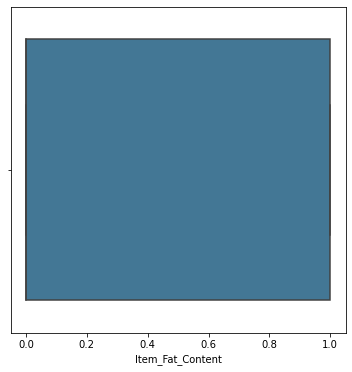

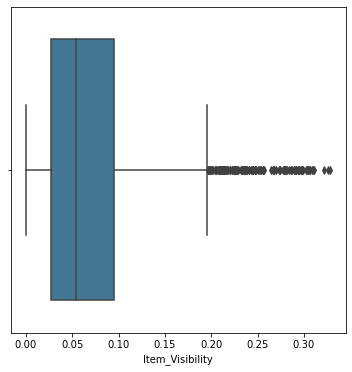

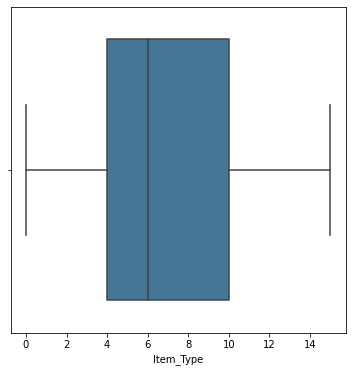

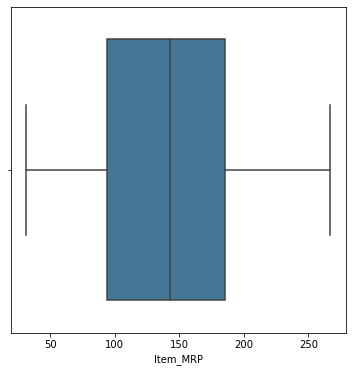

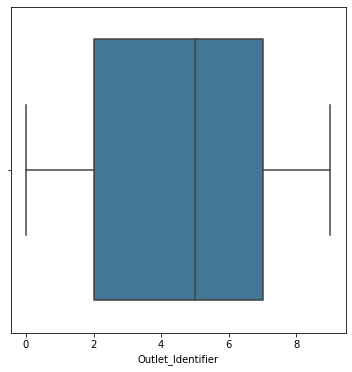

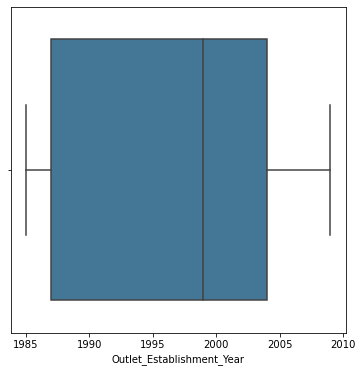

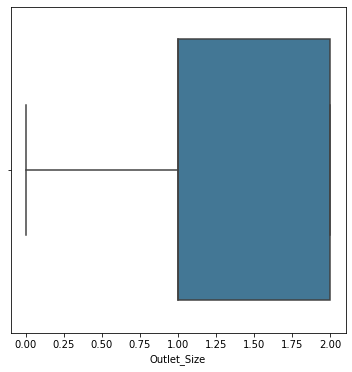

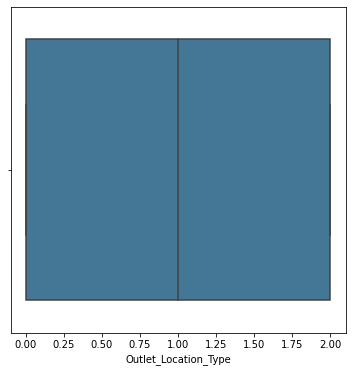

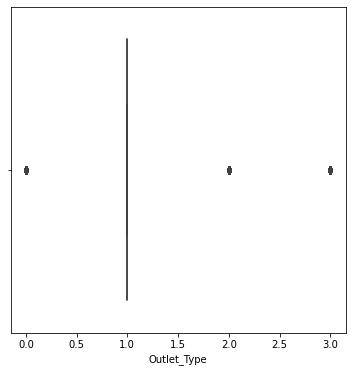

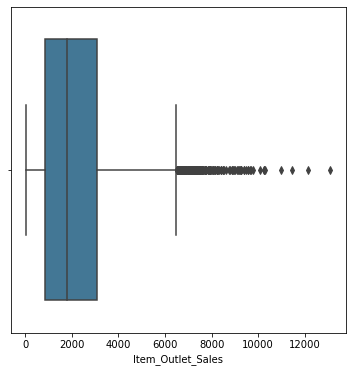

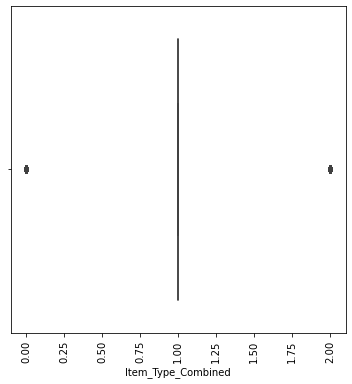

In [37]:
for j in train.columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(x=train[j][1:], data=train.iloc[:1],
                order=train[j][1:].value_counts().index,
                palette='mako')
plt.xticks(rotation=90)
plt.show()

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 

In [39]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,1
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,2
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,1


In [40]:
a = pd.get_dummies(train[['Item_Type','Outlet_Identifier','Outlet_Type']])
train = train.drop(['Item_Type','Outlet_Identifier','Outlet_Type',],axis = 1 )
train = pd.concat([train,a],axis = 1)

In [41]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Type,Outlet_Identifier,Outlet_Type
0,156,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,1,4,9,1
1,8,5.920,1,0.019278,48.2692,2009,1,2,443.4228,0,14,3,2
2,662,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,1,10,9,1
3,1121,19.200,1,0.000000,182.0950,1998,1,2,732.3800,1,6,0,0
4,1297,8.930,0,0.000000,53.8614,1987,0,2,994.7052,2,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,1,13,1,1
8519,897,8.380,1,0.046982,108.1570,2002,1,1,549.2850,1,0,7,1
8520,1357,10.600,0,0.035186,85.1224,2004,2,1,1193.1136,2,8,6,1
8521,681,7.210,1,0.145221,103.1332,2009,1,2,1845.5976,1,13,3,2


### Removing outliers

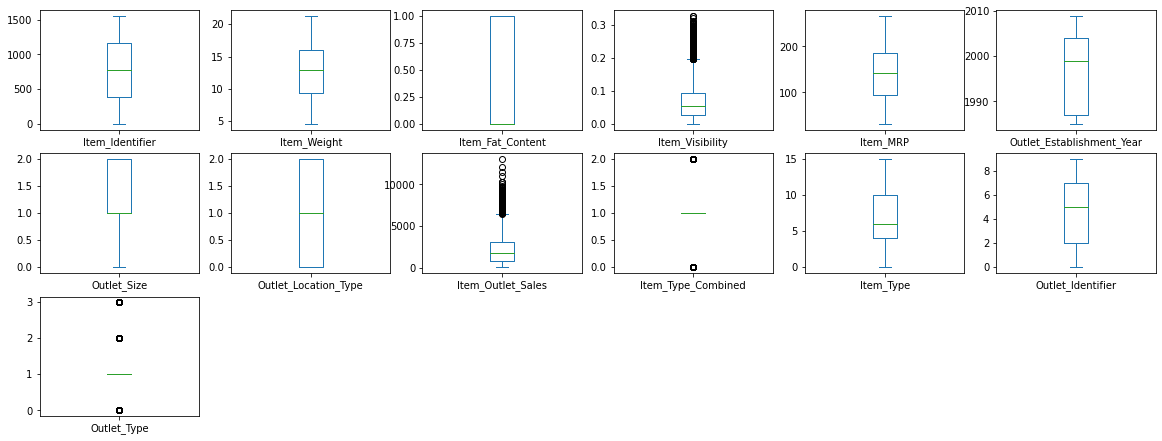

In [42]:
train.plot(kind = "box" , subplots = True , layout= (7,6), figsize =(20,18) )
plt.show()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

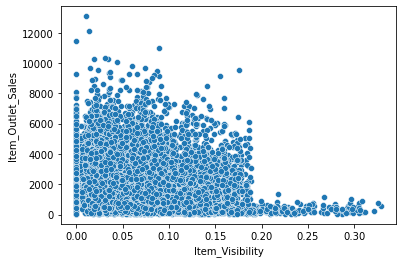

In [43]:
sns.scatterplot(x=train['Item_Visibility'],y=train['Item_Outlet_Sales'])

In [44]:
train[train['Item_Visibility']>=0.30].shape

(12, 13)

In [45]:
train=train[train['Item_Visibility']<0.30]

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

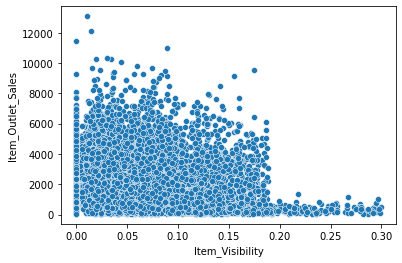

In [46]:
sns.scatterplot(x=train['Item_Visibility'],y=train['Item_Outlet_Sales'])

In [47]:
train


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Type,Outlet_Identifier,Outlet_Type
0,156,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,1,4,9,1
1,8,5.920,1,0.019278,48.2692,2009,1,2,443.4228,0,14,3,2
2,662,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,1,10,9,1
3,1121,19.200,1,0.000000,182.0950,1998,1,2,732.3800,1,6,0,0
4,1297,8.930,0,0.000000,53.8614,1987,0,2,994.7052,2,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,1,13,1,1
8519,897,8.380,1,0.046982,108.1570,2002,1,1,549.2850,1,0,7,1
8520,1357,10.600,0,0.035186,85.1224,2004,2,1,1193.1136,2,8,6,1
8521,681,7.210,1,0.145221,103.1332,2009,1,2,1845.5976,1,13,3,2


### Correlation

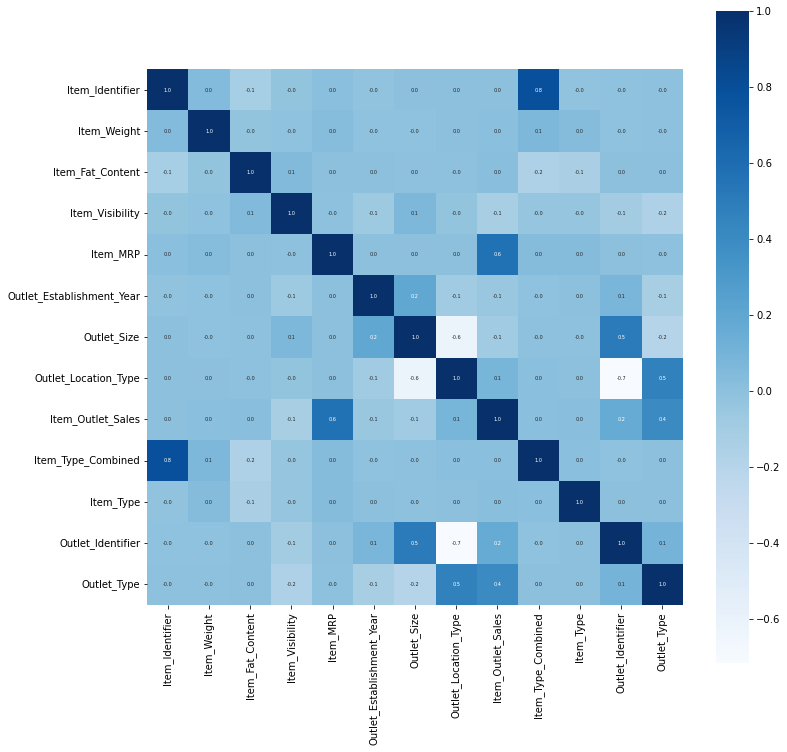

In [48]:
plt.figure(figsize=(12,12))
correlation =train.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Blues')
plt.show()

In [49]:
train.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [50]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Type,Outlet_Identifier,Outlet_Type
0,9.300,0,0.016047,249.8092,1,0,3735.1380,1,4,9,1
1,5.920,1,0.019278,48.2692,1,2,443.4228,0,14,3,2
2,17.500,0,0.016760,141.6180,1,0,2097.2700,1,10,9,1
3,19.200,1,0.000000,182.0950,1,2,732.3800,1,6,0,0
4,8.930,0,0.000000,53.8614,0,2,994.7052,2,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,2778.3834,1,13,1,1
8519,8.380,1,0.046982,108.1570,1,1,549.2850,1,0,7,1
8520,10.600,0,0.035186,85.1224,2,1,1193.1136,2,8,6,1
8521,7.210,1,0.145221,103.1332,1,2,1845.5976,1,13,3,2


### splitting data to train and test 

In [51]:
# splitting data to features and target
X = train.drop(columns='Item_Outlet_Sales', axis=1)
Y = train['Item_Outlet_Sales']

### Scalling 

In [52]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(8511, 10) (5957, 10) (2554, 10)


### Modeling

In [55]:
#Linear regression
model_linear = LinearRegression(normalize=True,fit_intercept= True)

In [56]:
model_linear.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [57]:
model_linear.score(X_train ,Y_train)

0.5090766813958871

In [58]:
model_linear.score(X_test , Y_test)

0.5109995012677842

In [59]:
# XGboost
model = XGBRegressor()

In [60]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [61]:
model.score(X_train ,Y_train)

0.8688000928574066

In [62]:
model.score(X_test , Y_test)

0.5393436459631936

In [63]:
#lasso
ls = Lasso(alpha = 0.01)
ls.fit(X_train,Y_train)

Lasso(alpha=0.01)

In [64]:
ls.score(X_train ,Y_train)

0.5090766808801999

In [65]:
ls.score(X_test,Y_test)

0.5110000676697851

In [66]:
# Random forest
forest_model = RandomForestRegressor(random_state=3)
forest_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=3)

In [67]:
forest_model.score(X_train ,Y_train)

0.9371627696261987

In [68]:
forest_model.score(X_test ,Y_test)

0.565841057317145

## Evaluation of model

In [69]:
# prediction for training data
xgb_training_predictions = model.predict(X_train)

# prediction for test data
xgb_test_predictions = model.predict(X_test)

In [70]:
#evaluation on training 
print(f"R2 Score: {round(r2_score(Y_train, xgb_training_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train, xgb_training_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train, xgb_training_predictions), 2)}")

R2 Score: 0.87
MSE: 385237.22
MAE: 447.28


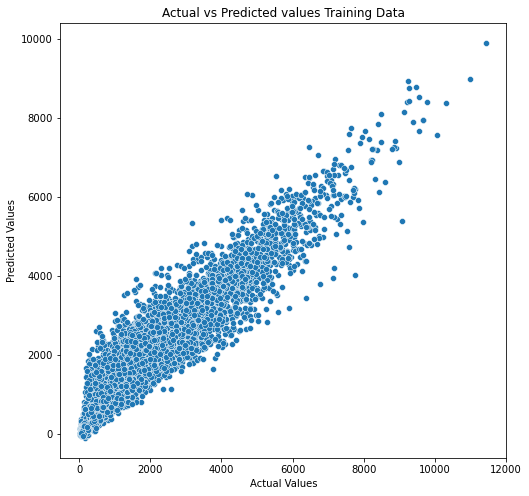

In [71]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_train, y = xgb_training_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [72]:
print(f"R2 Score: {round(r2_score(Y_test, xgb_test_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test, xgb_test_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test, xgb_test_predictions), 2)}")

R2 Score: 0.54
MSE: 1312783.5
MAE: 804.0


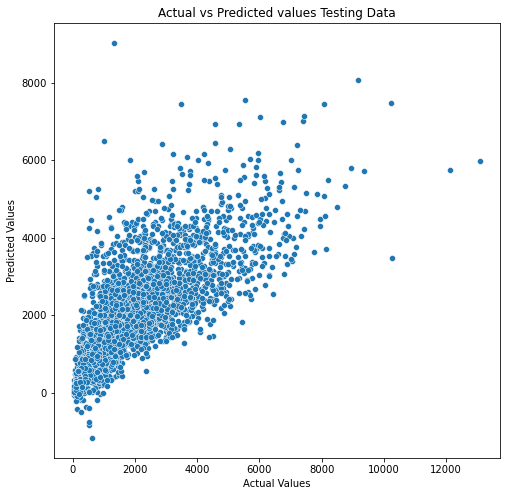

In [73]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_test, y = xgb_test_predictions)
plt.title("Actual vs Predicted values Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [74]:
# prediction for training data
random_forest_training_predictions = forest_model.predict(X_train)

# prediction for test data
random_forest_test_predictions = forest_model.predict(X_test)

In [75]:
#evaluation on training 
print(f"R2 Score: {round(r2_score(Y_train, random_forest_training_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train, random_forest_training_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train, random_forest_training_predictions), 2)}")

R2 Score: 0.94
MSE: 184506.53
MAE: 299.11


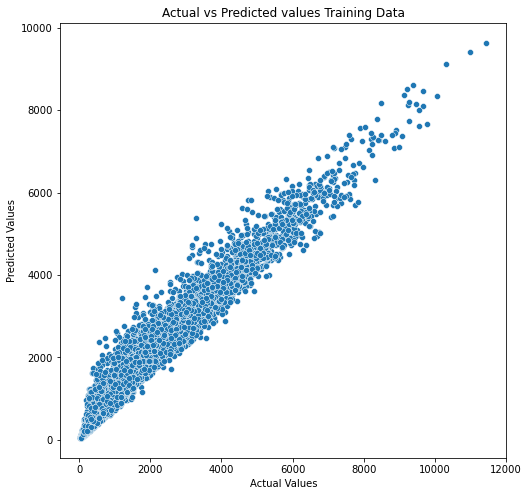

In [76]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_train, y = random_forest_training_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [77]:
print(f"R2 Score: {round(r2_score(Y_test, random_forest_test_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test, random_forest_test_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test, random_forest_test_predictions), 2)}")

R2 Score: 0.57
MSE: 1237270.89
MAE: 776.89


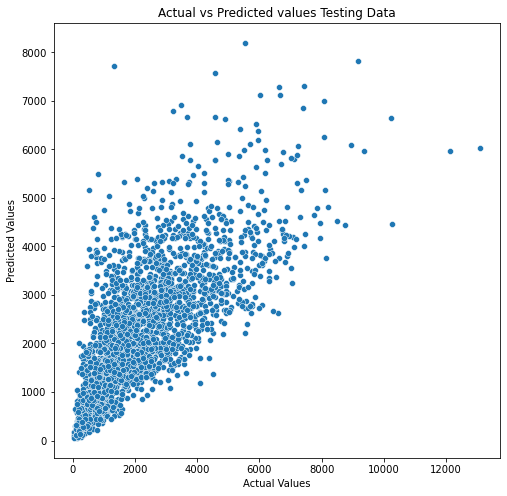

In [78]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_test, y = random_forest_test_predictions)
plt.title("Actual vs Predicted values Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### summary
#### The scores for both the training and test data are mentioned below for XGBoost:

### Training Data
- R2 Score : 0.85
- MSE : 449762.19
- MAE : 485.59
### Test Data
- R2 Score : 0.56
- MSE : 1278937.96
- MAE : 792.66

#### The scores for both the training and test data are mentioned below for Random forest:
### Training Data
- R2 Score: 0.94
- MSE: 184506.53
- MAE: 299.11
### Test Data
- R2 Score: 0.57
- MSE: 1237270.89
- MAE: 776.89

### We see that our last two models are overfitted on training data, thus the scores are not the best for test data.

### The End 